# Exploratory Data Analysis (EDA) on the Amazon Customer Reviews dataset

---

## Dataset Description

### Context

This dataset contains over **568,000 consumer reviews** for a wide range of products sold on **Amazon**. While it's available on multiple open data platforms, this version was curated for accessibility and ease of use in analysis and modeling tasks.

---

### Content Summary

- **Total Records:** 568,454  
- **Total Columns:** 10  
- **Domain:** `amazon.com`  
- **File Format:** `.csv`

---

### Available Fields

| Field Name             | Description                                 |
|------------------------|---------------------------------------------|
| `Id`                   | Unique review ID                            |
| `ProductId`            | Unique product identifier                   |
| `UserId`               | Unique user identifier                      |
| `ProfileName`          | User's display name                         |
| `HelpfulnessNumerator` | Number of users who found the review helpful|
| `HelpfulnessDenominator` | Total votes on helpfulness                |
| `Score`                | Rating given by the user (1 to 5)           |
| `Time`                 | Review timestamp (UNIX format)              |
| `Summary`              | Short summary of the review                 |
| `Text`                 | Full review content                         |

---

In [ ]:
# pip install nltk transformers torch pandas matplotlib seaborn numpy imbalanced-learn

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv("./data/Reviews.csv")

In [90]:
df.head(100)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
95,96,B0019CW0HE,A1BFNM27629VAV,E. Triebe,0,0,5,1320105600,Good healthy dog food,I've been very pleased with the Natural Balanc...
96,97,B0019CW0HE,A18AAABCIJKC5Q,Rhiever,0,0,5,1303776000,Great dog food,My 1-1/2 year old basenji/jack russell mix lov...
97,98,B0019CW0HE,A3UII2114114PI,"FuNky Faja ""SiLkk""",0,0,5,1297296000,"Great allergy sensitive dog food, dogs love it",Our pup has experienced allergies in forms of ...
98,99,B0019CW0HE,ABZ9F0D94YK45,Amazon-tron 3000,0,0,5,1295308800,Perfect for our English Bulldog with Allergies,My English Bulldog had skin allergies the summ...


In [91]:
df.shape

(568454, 10)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## Insights

In [93]:
# Checking which products have most reviews
top_products = df['ProductId'].value_counts().head(10)
print(top_products)

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
Name: count, dtype: int64


In [94]:
# Checking which products have most negative reviews
negative_reviews = df[df['Score'] <= 3]
top_negative_products = negative_reviews['ProductId'].value_counts().head(10)
print(top_negative_products)

ProductId
B000KV61FC    268
B000KV7ZGQ    268
B0041NYV8E    252
B006MONQMC    238
B002IEZJMA    200
B001VJ0B0I    182
B002LANN56    175
B003GTR8IO    174
B0090X8IPM    174
B005K4Q37A    169
Name: count, dtype: int64


In [95]:
# Check which user has most reviews
top_user = df['ProfileName'].value_counts().idxmax()
reviews_count = df['ProfileName'].value_counts().max()
print(f"{top_user} with {reviews_count} reviews")

C. F. Hill "CFH" with 451 reviews


## Delete unnecessary columns

In [96]:
df.drop(['Id', 'ProductId', "Summary", 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'Time', 'HelpfulnessDenominator'], axis=1, inplace=True)

In [97]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [98]:
df.isna().sum()

Score    0
Text     0
dtype: int64

In [99]:
df.duplicated().sum()

np.int64(174779)

In [100]:
# Delete duplicates duplicates
df.drop_duplicates(inplace=True)
df.shape

(393675, 2)

## Exploring target column `Score`

In [101]:
df["Score"].nunique()


5

In [102]:
df["Score"].value_counts()

Score
5    250745
4     56074
1     36280
3     29772
2     20804
Name: count, dtype: int64

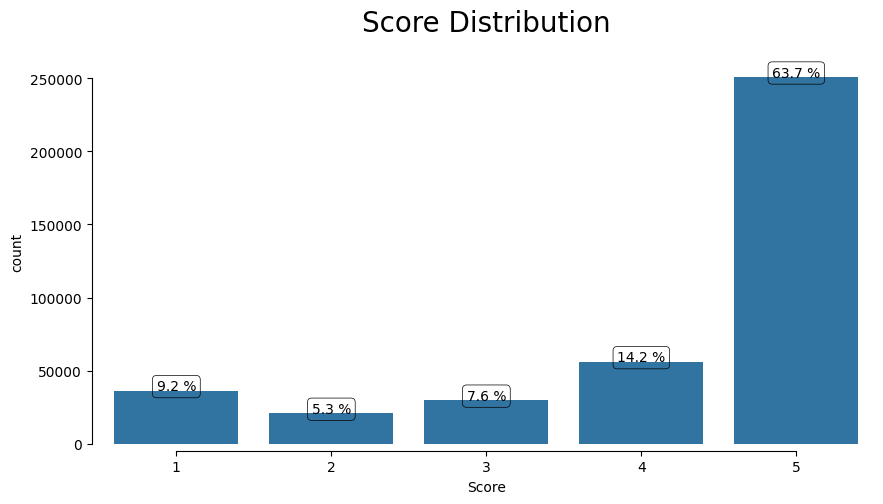

In [103]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Score"])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 75,
        "{:1.1f} %".format((height / total) * 100),
        ha="center",
        bbox=dict(facecolor="none", edgecolor="black", boxstyle="round", linewidth=0.5),
    )
ax.set_title("Score Distribution", fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)


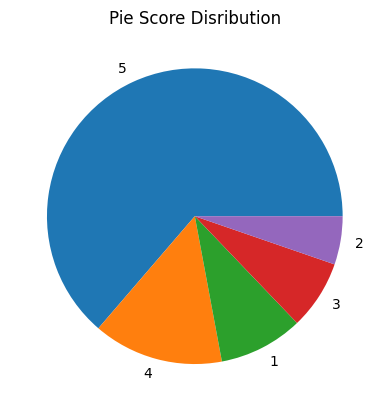

In [104]:
score_values = df["Score"].value_counts()
plt.pie(score_values, labels=score_values.index)
plt.title("Pie Score Disribution")
plt.show()


## **Observation**: 
> The distribution of score values isn't balanced at all

## Text preprocessing

In [105]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [106]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/denys.koval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/denys.koval/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/denys.koval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/denys.koval/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/denys.koval/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [108]:
stop_words = set(stopwords.words("english"))
lemmatization=WordNetLemmatizer()
stemming = PorterStemmer()


In [109]:
def clean_text(text):
    # 1. Convert to lower
    txt = text.lower()

    # 2. Split to words
    tokens = word_tokenize(txt)

    # 3. Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # 6. Apply Stemming
    tokens = [stemming.stem(word) for word in tokens]

    return " ".join(tokens)


In [110]:
def clean_text_safe(text):
    try:
        return clean_text(text)
    except Exception as e:
        print(f"Error processing: {text[:30]}... — {e}")
        return ""


df["cleaned_text"] = df["Text"].apply(clean_text_safe)


In [111]:
df

,Score,Text,cleaned_text
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut ... pean...
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
...,...,...,...
568449,5,Great for sesame chicken..this is a good if no...,great sesam chicken .. good better restur eate...
568450,2,I'm disappointed with the flavor. The chocolat...,'m disappoint flavor chocol note especi weak m...
568451,5,"These stars are small, so you can give 10-15 o...",star small give 10-15 one train session tri tr...
568452,5,These are the BEST treats for training and rew...,best treat train reward dog good groom lower c...


## Show most frequent tokens in text

In [112]:
# pip install wordcloud

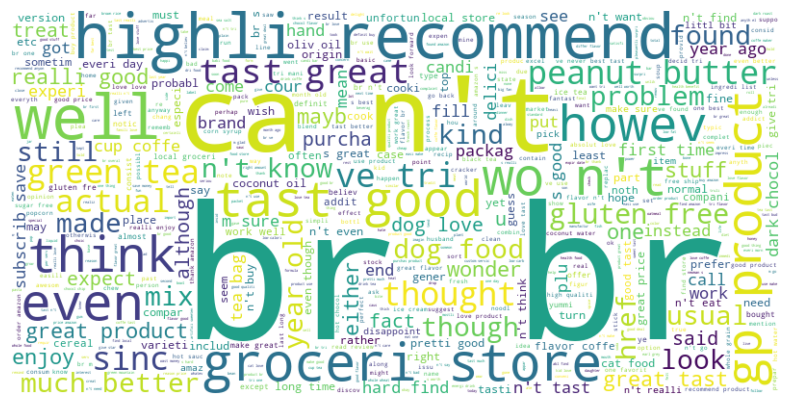

In [113]:
from wordcloud import WordCloud

all_text = " ".join(df["cleaned_text"])


wordcloud = WordCloud(
    width=800, height=400, max_words=1000, background_color="white"
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [114]:
len(all_text)

97714586

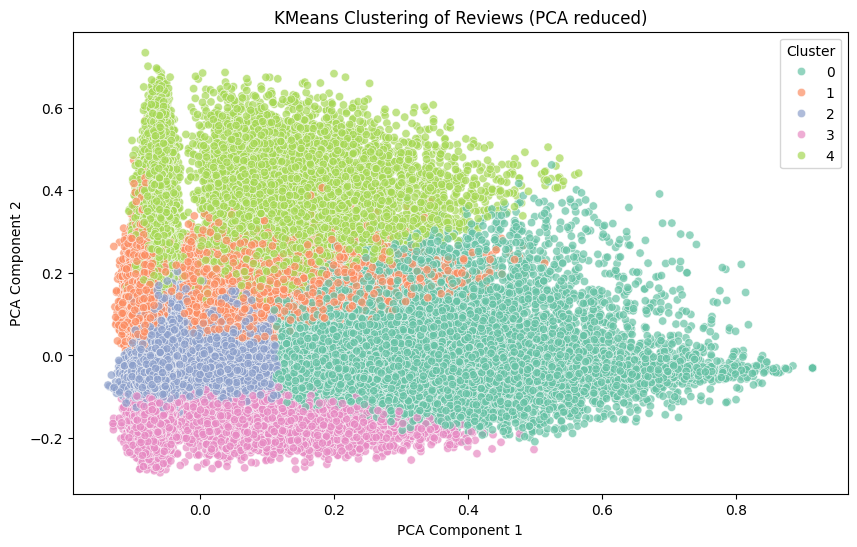

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X_tfidf = vectorizer.fit_transform(df["cleaned_text"])

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

df["cluster"] = clusters

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", alpha=0.7)
plt.title("KMeans Clustering of Reviews (PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [116]:
pd.crosstab(df["cluster"], df["Score"], normalize="index")

Score,1,2,3,4,5
cluster,,,,,
0,0.100465,0.063432,0.100741,0.179204,0.556157
1,0.079592,0.057618,0.084169,0.165298,0.613323
2,0.095938,0.051697,0.070909,0.134287,0.647169
3,0.087200,0.044350,0.067447,0.125034,0.675969
4,0.057955,0.045372,0.067482,0.136234,0.692958


## Relabeling to binary classification

In [117]:
df["label"] = df["Score"].apply(lambda x: 0 if x <= 3 else 1)

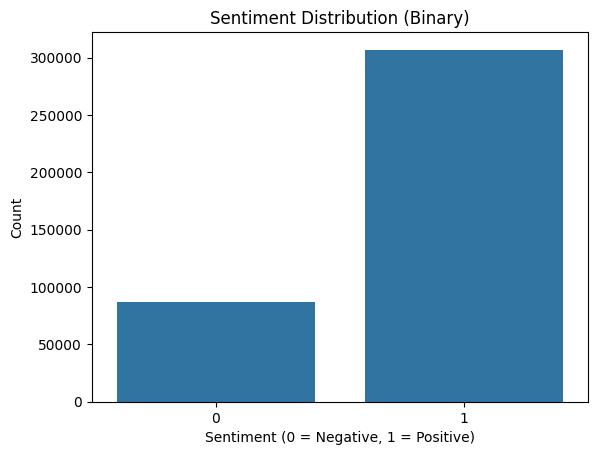

In [118]:
sns.countplot(x=df["label"])
plt.title("Sentiment Distribution (Binary)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


In [119]:
df["label"].value_counts()

label
1    306819
0     86856
Name: count, dtype: int64

## Splitting the data

In [120]:
X = df["Text"].tolist()
y = df["label"].tolist()

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

## Vectorization

In [122]:
from transformers import BertTokenizer
from tqdm import tqdm
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128


def tokenize_in_batches(texts, batch_size=5000):
    input_ids = []
    attention_masks = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Tokenizing"):
        batch = texts[i : i + batch_size]
        encoded = tokenizer(
            batch,
            padding="max_length",
            truncation=True,
            max_length=128,
            return_attention_mask=True,
        )
        input_ids.extend(encoded["input_ids"])
        attention_masks.extend(encoded["attention_mask"])

    return {
        "input_ids": torch.tensor(input_ids),
        "attention_mask": torch.tensor(attention_masks),
    }


In [124]:
import torch

train_enc = tokenize_in_batches(X_train)
val_enc = tokenize_in_batches(X_val)
test_enc = tokenize_in_batches(X_test)

train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
test_labels = torch.tensor(y_test)


Tokenizing: 100%|██████████| 8/8 [00:51<00:00,  6.49s/it]


In [ ]:
torch.save(
    {
        "train": {
            "input_ids": train_enc["input_ids"],
            "attention_mask": train_enc["attention_mask"],
            "labels": train_labels,
        },
        "val": {
            "input_ids": val_enc["input_ids"],
            "attention_mask": val_enc["attention_mask"],
            "labels": val_labels,
        },
        "test": {
            "input_ids": test_enc["input_ids"],
            "attention_mask": test_enc["attention_mask"],
            "labels": test_labels,
        },
    },
    "data/bert_binary_sentiment.pt",
)

print("✅ BERT-ready binary sentiment dataset saved as 'bert_binary_sentiment.pt'")

✅ BERT-ready binary sentiment dataset saved as 'bert_binary_sentiment.pt'
